## Temporal Overview

**NB**: This notebook should be run after `create-temp-data.ipynb` if the full year of data needs to be analyzed.

The goal of this notebook is to aggregate the data according to categories on a temporal basis. I want to know how individual categories evolve over time. The data should also retain macro categories, to allow me to filter them depending on the news website section.

In [ ]:
%pip install matplotlib

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
full_year = pd.read_csv("../input-data/temp-data.json")

## What is the frequency of publication across the year?

This question is purely analytical, I am not interested in exporting data that show pure temporal frequency.

In [4]:
full_year.columns

Index(['Unnamed: 0', 'abstract', 'web_url', 'snippet', 'lead_paragraph',
       'print_section', 'print_page', 'source', 'multimedia', 'headline',
       'keywords', 'pub_date', 'document_type', 'news_desk', 'section_name',
       'byline', 'type_of_material', '_id', 'word_count', 'uri',
       'subsection_name'],
      dtype='object')

In [ ]:
full_year = full_year[["_id", "headline", "pub_date", "section_name", "subsection_name", "keywords"]]

In [19]:
full_year["pub_date"] = pd.to_datetime(full_year["pub_date"])

In [28]:
article_counts_by_date = full_year.groupby(full_year["pub_date"].dt.date).size()
print(article_counts_by_date)

pub_date
2024-01-01     69
2024-01-02    103
2024-01-03    127
2024-01-04    142
2024-01-05    155
             ... 
2024-12-27    102
2024-12-28     60
2024-12-29     74
2024-12-30    108
2024-12-31     68
Length: 366, dtype: int64


In [32]:
article_counts_by_date = article_counts_by_date.reset_index(name="count")

In [33]:
article_counts_by_date

,pub_date,count
0,2024-01-01,69
1,2024-01-02,103
2,2024-01-03,127
3,2024-01-04,142
4,2024-01-05,155
...,...,...
361,2024-12-27,102
362,2024-12-28,60
363,2024-12-29,74
364,2024-12-30,108


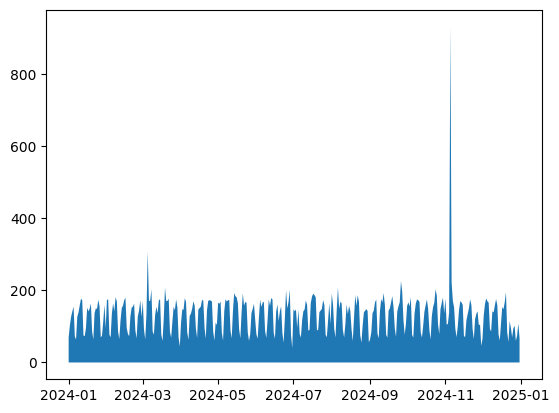

In [35]:
# Create data
x=article_counts_by_date["pub_date"]
y=article_counts_by_date["count"]

# Area plot
plt.fill_between(x, y)
plt.show()
